In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [2]:
def preprocess(df, agrupamento):
    df2 = df.copy()
    df2['DATA'] = df2['DATA'].astype(str)
    if agrupamento == 'Anual':
        df2[agrupamento] = df2['DATA'].apply(lambda x: x[:4])
    elif agrupamento == 'Mensal':
        df2[agrupamento] = df2['DATA'].apply(lambda x: x[:7])
    else:
        df2[agrupamento] = df2['DATA']
        
    
    df2 = df2.groupby([agrupamento]).count().reset_index().rename(columns={'ID': 'Casos'})
    return df2

In [3]:
df = pd.read_csv('../assets/Dados/SINAN-ZIKA.csv')

In [4]:
df = preprocess(df, 'Mensal')

In [5]:
df.head(3)

,Mensal,Casos,DATA,ID_AGRAVO,SEXO,ID_MUNICIP
0,2016-01,37260,37260,37260,37260,37260
1,2016-02,71565,71565,71565,71565,71565
2,2016-03,77624,77624,77624,77624,77624


In [6]:
df = df[['Casos','Mensal']]
df.index.freq = df['Mensal']
del df['Mensal']
arma_mod20 = ARIMA(df, order=(2, 0, 2)).fit()

In [7]:
resid = arma_mod20.resid

In [8]:
arma_mod20.resid.values

array([ 3.20316469e+04,  4.41267323e+04,  1.24350697e+04, -1.53330072e+02,
        2.97826588e+04,  6.98477480e+03, -1.05824486e+04,  3.42846686e+03,
        4.66282530e+03, -5.29653661e+03, -2.69472687e+03,  3.45404282e+03,
        3.04122536e+02, -5.31764549e+03,  2.57186283e+03,  1.66488187e+03,
       -2.63163378e+03, -2.54135462e+03,  2.89461362e+03, -3.64187319e+02,
       -5.00082714e+03,  7.54548151e+02,  1.47304305e+03, -4.10654837e+03,
       -1.06674194e+03,  1.45514901e+03, -1.27791062e+03, -2.42288951e+03,
       -7.58530374e+01,  2.81494191e+02, -1.39415327e+03, -1.99239195e+03,
       -2.72486014e+02, -1.03964228e+01, -2.44022892e+03, -1.08104375e+03,
        9.14454472e+02, -1.16670178e+03, -2.44935874e+03,  2.21323618e+03,
        1.87768992e+02, -4.63844891e+03,  2.17422101e+03,  1.61248350e+03,
       -4.46755536e+03, -1.34352473e+03,  2.51795507e+03, -2.49913595e+03,
       -2.81485808e+03,  1.08302206e+03,  3.71961138e+02, -3.32512795e+03,
       -1.52397602e+01,  

In [9]:
print(arma_mod20.params)

const     5.228353e+03
ar.L1     1.386748e+00
ar.L2    -9.999997e-01
ma.L1     5.274362e-01
ma.L2     9.998767e-01
sigma2    1.327093e+07
dtype: float64


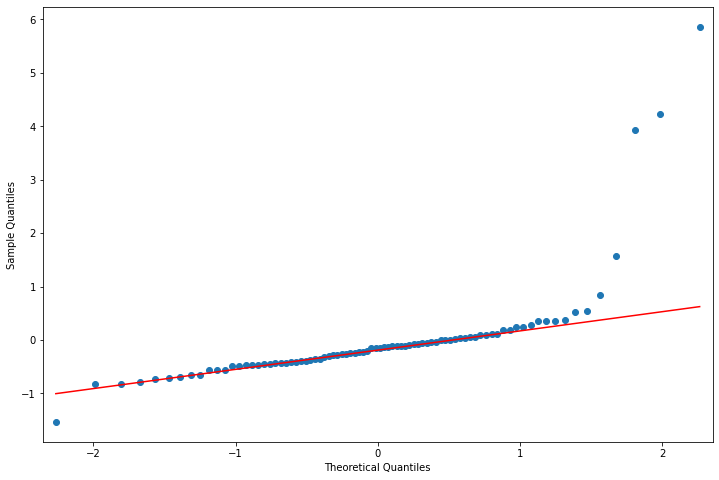

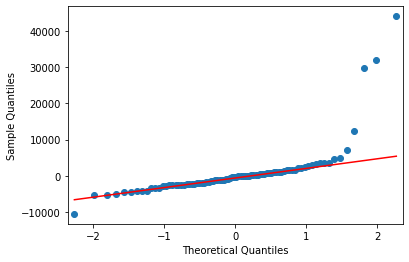

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)
qqplot_data = qqplot(resid, line='q').gca().lines

In [11]:

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Gráfico de resíduos',
    'xaxis': {
        'title': 'Quantis Teóricos',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Quantis da amostra'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})

fig.show()